# 라이브러리 설정

In [44]:
## 사용할 패키지 불러오기

import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as fm

from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from unittest.mock import inplace
from IPython.display import set_matplotlib_formats
from yellowbrick.cluster import KElbowVisualizer
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from sklearn.model_selection import train_test_split

from random import randint
import datetime
import math
import time
import datetime
import warnings
import mariadb
import pymysql

warnings.simplefilter(action='ignore', category=FutureWarning)
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
warnings.filterwarnings(action='ignore')
#그래프에서 음수 값이 나올 때, 깨지는 현상 방지
mpl.rc('axes',unicode_minus=False)

# Korean Font Setting
plt.rcParams["font.family"] = 'Malgun Gothic'

In [45]:
# 라이브러리

def day_extract(Time):
    splited = Time.split(' ')
    return splited[0]


def to_dt(Time):
    return datetime.datetime.strptime(Time, '%Y-%m-%d %H')


def to_datetime(Time):
    return datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M')


def to_datetime_with_seconds(Time):
    return datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')

# 날씨 데이터 Load

In [46]:
''''''
# WF_df = pd.concat([WF_df, temp_df])
# WF_df#.to_csv('./wfdf.csv', encoding='cp949')
WF_df = pd.read_csv('wfdf.csv', encoding='cp949',index_col=0)
WF_df



,baseDT,fcstDT,PCP,POP,PTY,REH,SKY,SNO,TMN,TMP,TMX,UUU,VEC,VVV,WAV,WSD,lc
0,2022-04-05 23:00:00,2022-04-06 00:00:00,강수없음,20.0,0.0,70.0,3.0,적설없음,NaN,9.0,NaN,0.8,225.0,0.8,0.0,1.2,남가좌제1동
1,2022-04-05 23:00:00,2022-04-06 01:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,0.6,221.0,0.7,0.0,1.0,남가좌제1동
2,2022-04-05 23:00:00,2022-04-06 02:00:00,강수없음,20.0,0.0,75.0,3.0,적설없음,NaN,8.0,NaN,0.7,234.0,0.5,0.0,0.9,남가좌제1동
3,2022-04-05 23:00:00,2022-04-06 03:00:00,강수없음,20.0,0.0,80.0,3.0,적설없음,NaN,7.0,NaN,0.8,270.0,0.0,0.0,0.8,남가좌제1동
4,2022-04-05 23:00:00,2022-04-06 04:00:00,강수없음,0.0,0.0,85.0,1.0,적설없음,NaN,8.0,NaN,0.2,311.0,-0.2,0.0,0.3,남가좌제1동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149980,2023-01-09 20:00:00,2023-01-12 20:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,-1.7,117.0,0.9,0.0,2.0,남가좌제1동
149981,2023-01-09 20:00:00,2023-01-12 21:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,-1.9,121.0,1.2,0.0,2.3,남가좌제1동
149982,2023-01-09 20:00:00,2023-01-12 22:00:00,강수없음,30.0,0.0,80.0,4.0,적설없음,NaN,9.0,NaN,-2.2,118.0,1.2,0.0,2.6,남가좌제1동
149983,2023-01-09 20:00:00,2023-01-12 23:00:00,강수없음,30.0,0.0,80.0,4.0,적설없음,NaN,9.0,NaN,-2.2,118.0,1.2,0.0,2.6,남가좌제1동


 + PCP 강우상태
<br><br>
 + POP 강수확률(%)
<br><br>
 + PTY 강수형태
    - 없음(0), 비(1), 비/눈(2), 눈(3)
<br><br>
 + REH 습도(%)
<br><br>
 + SKY 하늘상태
   - 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)
<br><br>   
 + SNO 적설상태
<br><br>
 + TMN 일 최저기온(℃)
<br><br>
 + TMP 온도(℃)
<br><br>
 + TMX 일 최고기온(℃)
<br><br>
 + UUU 동서바람성분(m/s)
<br><br>
 + VEC 풍향(deg)
<br><br>
 + VVV 남북바람성분(m/s)
<br><br>
 + WAV 파고
<br><br>
 + WSD 풍속(m/s)

## 불쾌지수
+ DI =9/5Ta-0.55(1-RH)(9/5Ta-26)+32  
+ Ta : 건구온도 (℃)  
+ RH : 상대습도 (소수단위)  

In [47]:
WF_df['DI'] = (9/5*WF_df['TMP']) - (0.55*((100-WF_df['REH'])/100)*(9/5*WF_df['TMP']-26)) + 32
WF_df

,baseDT,fcstDT,PCP,POP,PTY,REH,SKY,SNO,TMN,TMP,TMX,UUU,VEC,VVV,WAV,WSD,lc,DI
0,2022-04-05 23:00:00,2022-04-06 00:00:00,강수없음,20.0,0.0,70.0,3.0,적설없음,NaN,9.0,NaN,0.8,225.0,0.8,0.0,1.2,남가좌제1동,49.8170
1,2022-04-05 23:00:00,2022-04-06 01:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,0.6,221.0,0.7,0.0,1.0,남가좌제1동,49.5475
2,2022-04-05 23:00:00,2022-04-06 02:00:00,강수없음,20.0,0.0,75.0,3.0,적설없음,NaN,8.0,NaN,0.7,234.0,0.5,0.0,0.9,남가좌제1동,47.9950
3,2022-04-05 23:00:00,2022-04-06 03:00:00,강수없음,20.0,0.0,80.0,3.0,적설없음,NaN,7.0,NaN,0.8,270.0,0.0,0.0,0.8,남가좌제1동,46.0740
4,2022-04-05 23:00:00,2022-04-06 04:00:00,강수없음,0.0,0.0,85.0,1.0,적설없음,NaN,8.0,NaN,0.2,311.0,-0.2,0.0,0.3,남가좌제1동,47.3570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149980,2023-01-09 20:00:00,2023-01-12 20:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,-1.7,117.0,0.9,0.0,2.0,남가좌제1동,49.5475
149981,2023-01-09 20:00:00,2023-01-12 21:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,-1.9,121.0,1.2,0.0,2.3,남가좌제1동,49.5475
149982,2023-01-09 20:00:00,2023-01-12 22:00:00,강수없음,30.0,0.0,80.0,4.0,적설없음,NaN,9.0,NaN,-2.2,118.0,1.2,0.0,2.6,남가좌제1동,49.2780
149983,2023-01-09 20:00:00,2023-01-12 23:00:00,강수없음,30.0,0.0,80.0,4.0,적설없음,NaN,9.0,NaN,-2.2,118.0,1.2,0.0,2.6,남가좌제1동,49.2780


# 전력사용량 데이터 Load

In [48]:
usage_df = pd.read_csv('APT0000005.csv')

usage_df['index'] = pd.to_datetime(usage_df['index'])
usage_df.set_index('index',inplace=True)

usage_df

,101-1001,102-1201,101-1002,101-101,101-102,101-103,101-104,101-1101,101-1102,101-1201,...,110-402,110-501,109-403,109-803,110-602,110-701,110-702,110-801,109-804,109-404
index,,,,,,,,,,,,,,,,,,,,,
2021-09-01 00:00:00,0.090,0.190,0.340,0.230,0.490,0.520,0.220,0.360,0.540,0.420,...,0.310,0.310,0.270,0.110,0.330,0.750,0.820,0.470,0.260,0.220
2021-09-01 01:00:00,0.090,0.120,0.240,0.280,0.460,0.390,0.240,0.380,0.500,0.320,...,0.230,0.260,0.280,0.110,0.300,0.610,0.400,0.540,0.200,0.250
2021-09-01 02:00:00,0.080,0.110,0.220,0.340,0.220,0.420,0.220,0.410,0.480,0.220,...,0.180,0.230,0.290,0.120,0.280,0.350,0.340,0.640,0.180,0.200
2021-09-01 03:00:00,0.000,0.120,0.230,0.280,0.180,0.380,0.230,0.330,0.430,0.250,...,0.170,0.260,0.290,0.130,0.330,0.360,0.330,0.640,0.200,0.300
2021-09-01 04:00:00,0.100,0.110,0.240,0.330,0.170,0.400,0.270,0.360,0.570,0.220,...,0.180,0.230,0.200,0.130,0.270,0.360,0.330,0.810,0.200,0.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.292,0.442,0.209,0.139,1.774,0.523,0.115,0.236,2.203,0.434,...,0.598,0.209,0.451,0.325,0.914,0.697,0.260,1.088,0.656,0.341
2022-12-31 20:00:00,0.392,0.518,0.151,0.137,0.539,0.456,0.107,0.205,1.368,1.048,...,0.923,0.239,0.521,0.276,0.804,0.584,0.275,1.009,0.883,0.337
2022-12-31 21:00:00,0.335,0.740,0.282,0.128,0.593,0.443,0.179,0.197,0.748,0.870,...,0.587,0.269,0.340,0.322,0.882,0.559,0.278,0.910,0.713,0.337


 + https://github.com/krishnavamshi3/Driving-range-Prediction-and-Energy-Consumption-in-EV-s

# Data Cleansing

In [49]:
WF_df['fcstDT'] = pd.to_datetime(WF_df['fcstDT'])
WF_df.set_index('fcstDT',inplace=True)
WF_df.head()

,baseDT,PCP,POP,PTY,REH,SKY,SNO,TMN,TMP,TMX,UUU,VEC,VVV,WAV,WSD,lc,DI
fcstDT,,,,,,,,,,,,,,,,,
2022-04-06 00:00:00,2022-04-05 23:00:00,강수없음,20.0,0.0,70.0,3.0,적설없음,NaN,9.0,NaN,0.8,225.0,0.8,0.0,1.2,남가좌제1동,49.8170
2022-04-06 01:00:00,2022-04-05 23:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,0.6,221.0,0.7,0.0,1.0,남가좌제1동,49.5475
2022-04-06 02:00:00,2022-04-05 23:00:00,강수없음,20.0,0.0,75.0,3.0,적설없음,NaN,8.0,NaN,0.7,234.0,0.5,0.0,0.9,남가좌제1동,47.9950
2022-04-06 03:00:00,2022-04-05 23:00:00,강수없음,20.0,0.0,80.0,3.0,적설없음,NaN,7.0,NaN,0.8,270.0,0.0,0.0,0.8,남가좌제1동,46.0740
2022-04-06 04:00:00,2022-04-05 23:00:00,강수없음,0.0,0.0,85.0,1.0,적설없음,NaN,8.0,NaN,0.2,311.0,-0.2,0.0,0.3,남가좌제1동,47.3570


In [50]:
WF_df['TMP'][(WF_df.index >= '2022-09-20 00:00:00') & (WF_df.index <= '2022-09-25 00:00:00') & (WF_df['TMP'] <= 0.5)] = np.nan

idx = WF_df['TMP'].isna()
WF_df[idx]['TMP']

WF_df['TMP'] = WF_df['TMP'].interpolate(method='linear')

WF_df.head()

,baseDT,PCP,POP,PTY,REH,SKY,SNO,TMN,TMP,TMX,UUU,VEC,VVV,WAV,WSD,lc,DI
fcstDT,,,,,,,,,,,,,,,,,
2022-04-06 00:00:00,2022-04-05 23:00:00,강수없음,20.0,0.0,70.0,3.0,적설없음,NaN,9.0,NaN,0.8,225.0,0.8,0.0,1.2,남가좌제1동,49.8170
2022-04-06 01:00:00,2022-04-05 23:00:00,강수없음,30.0,0.0,75.0,4.0,적설없음,NaN,9.0,NaN,0.6,221.0,0.7,0.0,1.0,남가좌제1동,49.5475
2022-04-06 02:00:00,2022-04-05 23:00:00,강수없음,20.0,0.0,75.0,3.0,적설없음,NaN,8.0,NaN,0.7,234.0,0.5,0.0,0.9,남가좌제1동,47.9950
2022-04-06 03:00:00,2022-04-05 23:00:00,강수없음,20.0,0.0,80.0,3.0,적설없음,NaN,7.0,NaN,0.8,270.0,0.0,0.0,0.8,남가좌제1동,46.0740
2022-04-06 04:00:00,2022-04-05 23:00:00,강수없음,0.0,0.0,85.0,1.0,적설없음,NaN,8.0,NaN,0.2,311.0,-0.2,0.0,0.3,남가좌제1동,47.3570


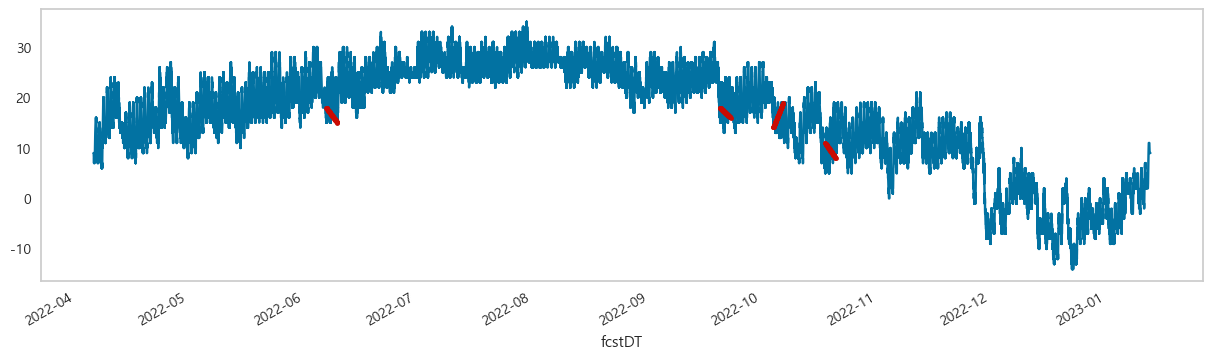

In [51]:
# Visualization
plt.figure(figsize=(15,4))
WF_df['TMP'].plot()
WF_df[idx]['TMP'].plot(style='r.')
plt.grid()

<AxesSubplot:title={'center':'상관관계 heatmap'}>

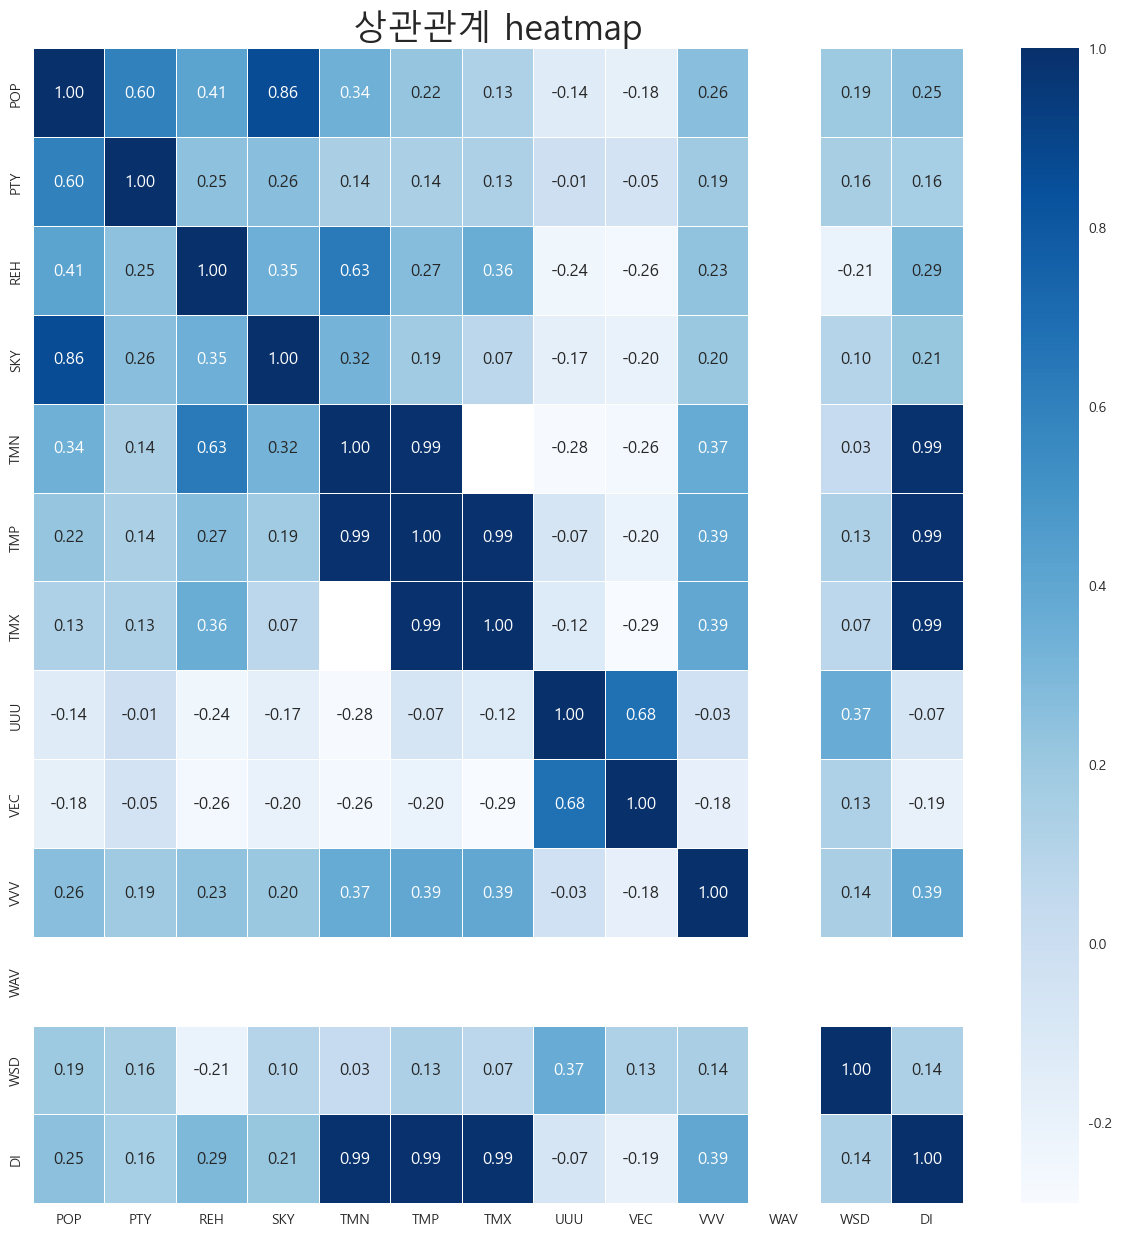

In [52]:
plt.figure(figsize=(15,15))
plt.title("상관관계 heatmap", fontsize=25)
sns.heatmap(data = WF_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# Data Formatting

In [53]:
first_dt = WF_df.index[0]
last_dt = usage_df.index[-1]

mean_WF_df = WF_df.groupby(level=0).mean()
UG_df = usage_df[(usage_df.index >= first_dt) & (usage_df.index <= last_dt)]

In [54]:
for i in range(len(UG_df.columns)):
    
    # Building DataFrame for forecasting
    columns                             = ['weekday', 'MONTH', 'DAY', 'HOUR', 'TEM','DI', 'WSD',str(UG_df.columns[i])]
    globals()['df_'+str(i)]             = pd.DataFrame(UG_df.iloc[:,i])
    globals()['df_'+str(i)]['weekday']  = globals()['df_'+str(i)].index.weekday
    globals()['df_'+str(i)]['MONTH']    = globals()['df_'+str(i)].index.month
    globals()['df_'+str(i)]['DAY']      = globals()['df_'+str(i)].index.day
    globals()['df_'+str(i)]['HOUR']     = globals()['df_'+str(i)].index.hour
    globals()['df_'+str(i)]['TEM']      = mean_WF_df['TMP']
    globals()['df_'+str(i)]['DI']       = mean_WF_df['DI']
    globals()['df_'+str(i)]['WSD']      = mean_WF_df['WSD']
    globals()['df_'+str(i)]             = globals()['df_'+str(i)][columns]
    
    globals()['df_train'+str(i)]        = globals()['df_'+str(i)].loc['2022-04-06 00:00:00' : '2022-10-31 23:00:00']
    globals()['df_test'+str(i)]         = globals()['df_'+str(i)].loc['2022-11-01 00:00:00' : '2022-12-26 23:00:00']
    
    globals()['df_train_status'+str(i)] = globals()['df_train'+str(i)].describe().transpose()
    
    # Normalization
    def norm(x):
        return (x - globals()['df_train_status'+str(i)]['mean']) / globals()['df_train_status'+str(i)]['std']

    # Normalization for training
    globals()['norm_df_train'+str(i)] = norm(globals()['df_train'+str(i)])
    
    # Normalization for testing
    globals()['norm_df_test'+str(i)]  = norm(globals()['df_test'+str(i)])
    
    

In [55]:
df_train0

,weekday,MONTH,DAY,HOUR,TEM,DI,WSD,101-1001
index,,,,,,,,
2022-04-06 00:00:00,2,4,6,0,9.000000,49.817000,1.200000,0.059
2022-04-06 01:00:00,2,4,6,1,9.000000,49.547500,1.000000,0.060
2022-04-06 02:00:00,2,4,6,2,8.000000,47.995000,0.900000,0.058
2022-04-06 03:00:00,2,4,6,3,7.000000,46.074000,0.800000,0.054
2022-04-06 04:00:00,2,4,6,4,8.000000,47.357000,0.300000,0.054
...,...,...,...,...,...,...,...,...
2022-10-31 19:00:00,0,10,31,19,14.360000,57.887160,0.756000,0.325
2022-10-31 20:00:00,0,10,31,20,14.000000,57.327600,0.700000,0.331
2022-10-31 21:00:00,0,10,31,21,13.615385,56.707385,0.653846,0.364


In [56]:
norm_df_train0.tail(25)

,weekday,MONTH,DAY,HOUR,TEM,DI,WSD,101-1001
index,,,,,,,,
2022-10-30 23:00:00,1.495083,1.484604,1.597589,1.661159,-1.402561,-1.389114,-0.432363,-0.605558
2022-10-31 00:00:00,-1.504652,1.484604,1.712488,-1.661159,-1.426826,-1.407640,-0.580806,-1.393428
2022-10-31 01:00:00,-1.504652,1.484604,1.712488,-1.516711,-1.448077,-1.425760,-0.524917,-1.402807
2022-10-31 02:00:00,-1.504652,1.484604,1.712488,-1.372262,-1.546697,-1.531888,-0.479797,-1.393428
2022-10-31 03:00:00,-1.504652,1.484604,1.712488,-1.227813,-1.614834,-1.603776,-0.477792,-1.384048
2022-10-31 04:00:00,-1.504652,1.484604,1.712488,-1.083365,-1.614834,-1.607568,-0.553994,-1.290254
2022-10-31 05:00:00,-1.504652,1.484604,1.712488,-0.938916,-1.614834,-1.610259,-0.515893,-1.393428
2022-10-31 06:00:00,-1.504652,1.484604,1.712488,-0.794467,-1.644035,-1.643157,-0.480513,-1.402807
2022-10-31 07:00:00,-1.504652,1.484604,1.712488,-0.650019,-1.781932,-1.793279,-0.521336,-1.402807


In [57]:
norm_df_test0

,weekday,MONTH,DAY,HOUR,TEM,DI,WSD,101-1001
index,,,,,,,,
2022-11-01 00:00:00,-1.004696,1.993263,-1.734478,-1.661159,-1.546697,-1.547678,-1.388692,-1.412187
2022-11-01 01:00:00,-1.004696,1.993263,-1.734478,-1.516711,-1.546697,-1.563756,-1.522565,-1.412187
2022-11-01 02:00:00,-1.004696,1.993263,-1.734478,-1.372262,-1.546697,-1.566589,-1.407259,-1.412187
2022-11-01 03:00:00,-1.004696,1.993263,-1.734478,-1.227813,-1.614834,-1.645365,-1.335068,-1.421566
2022-11-01 04:00:00,-1.004696,1.993263,-1.734478,-1.083365,-1.682971,-1.716132,-1.296967,-1.421566
...,...,...,...,...,...,...,...,...
2022-12-26 19:00:00,-1.504652,2.501923,1.137993,1.083365,-4.101836,-3.855425,-0.912145,0.876387
2022-12-26 20:00:00,-1.504652,2.501923,1.137993,1.227813,-4.129091,-4.024277,-0.980727,0.566866
2022-12-26 21:00:00,-1.504652,2.501923,1.137993,1.372262,-4.128043,-4.090906,-1.003881,0.913904


In [58]:
normed_train_data = norm_df_train0.values
normed_test_data = norm_df_test0.values

In [59]:
# Traing/testing input/outout dataset
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - (seq_length)):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, -1]
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

seq_length = 24
normed_trainX, normed_trainY  = build_dataset(normed_train_data, seq_length)
normed_testX, normed_testY  = build_dataset(normed_test_data, seq_length)

In [60]:
normed_trainX.shape, normed_trainY.shape

((4992, 24, 8), (4992,))

In [61]:
df_train_status0

,count,mean,std,min,25%,50%,75%,max
weekday,5016.0,3.009569,2.000176,0.000000,1.000000,3.000000,5.000000,6.000000
MONTH,5016.0,7.081340,1.965952,4.000000,5.000000,7.000000,9.000000,10.000000
DAY,5016.0,16.095694,8.703308,1.000000,9.000000,16.000000,24.000000,31.000000
HOUR,5016.0,11.500000,6.922877,0.000000,5.750000,11.500000,17.250000,23.000000
TEM,5016.0,21.079916,5.870521,5.047619,16.809524,22.000000,25.709596,34.130435
DI,5016.0,68.006488,8.992832,42.786475,61.366020,68.841814,75.496946,84.531957
WSD,5016.0,1.961604,1.049837,0.284615,1.208992,1.711556,2.506923,8.086957
101-1001,5016.0,0.213563,0.106617,0.054000,0.095000,0.239000,0.299000,0.682000


In [62]:
normed_testX.shape, normed_testY.shape

((1320, 24, 8), (1320,))

In [63]:
# cnn function 생성
def cnn_1d(input_size,):

    model = tf.keras.Sequential()

    # VGGNet Style
    model.add(tf.keras.layers.Conv1D(32, 3, strides=1, activation='relu', padding='same', input_shape = input_size))
    model.add(tf.keras.layers.Conv1D(32, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv1D(32, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool1D(3))

    model.add(tf.keras.layers.Conv1D(64, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv1D(64, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv1D(64, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool1D(3))

    model.add(tf.keras.layers.Conv1D(128, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv1D(128, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv1D(128, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool1D(2))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dense(1))

    return model

# xgb function 생성
def xgb(params=None):
        
    xgb_model = XGBRegressor(**params) if params is not None else XGBRegressor() # parameter 수정 된 파라미터가 있을 시 해당 parameter 적용, 아니면 그냥 기본 모델 적용

    return xgb_model

result_df = pd.DataFrame()

In [64]:
print()
model = cnn_1d(normed_trainX.shape[1:])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 24, 32)            800       
                                                                 
 conv1d_12 (Conv1D)          (None, 24, 32)            3104      
                                                                 
 conv1d_13 (Conv1D)          (None, 24, 32)            3104      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 8, 32)            0         
 1D)                                                             
                                                                 
 conv1d_14 (Conv1D)          (None, 8, 64)             6208      
                                                                 
 conv1d_15 (Conv1D)          (None, 8, 64)             12352     
                                                     

## model compile

In [65]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='mean_squared_error',
             metrics=['mean_absolute_error', 'mean_squared_error'])

In [66]:
EPOCHS = 100

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_trainX, normed_trainY, epochs=EPOCHS, validation_split = 0.2, callbacks=[early_stop])

Epoch 1/100
125/125 [==============================] - 26s 185ms/step - loss: 0.5129 - mean_absolute_error: 0.5460 - mean_squared_error: 0.5129 - val_loss: 0.4353 - val_mean_absolute_error: 0.4701 - val_mean_squared_error: 0.4353
Epoch 2/100
125/125 [==============================] - 22s 178ms/step - loss: 0.3974 - mean_absolute_error: 0.4694 - mean_squared_error: 0.3974 - val_loss: 0.4709 - val_mean_absolute_error: 0.5347 - val_mean_squared_error: 0.4709
Epoch 3/100
125/125 [==============================] - 22s 172ms/step - loss: 0.3621 - mean_absolute_error: 0.4388 - mean_squared_error: 0.3621 - val_loss: 0.4035 - val_mean_absolute_error: 0.4438 - val_mean_squared_error: 0.4035
Epoch 4/100
125/125 [==============================] - 20s 163ms/step - loss: 0.3473 - mean_absolute_error: 0.4256 - mean_squared_error: 0.3473 - val_loss: 0.4018 - val_mean_absolute_error: 0.4653 - val_mean_squared_error: 0.4018
Epoch 5/100
125/125 [==============================] - 22s 176ms/step - loss: 0.

In [67]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,0.512869,0.545996,0.512869,0.435263,0.470131,0.435263,0
1,0.397445,0.469411,0.397445,0.470888,0.534663,0.470888,1
2,0.362053,0.438827,0.362053,0.403491,0.443800,0.403491,2
3,0.347265,0.425576,0.347265,0.401810,0.465266,0.401810,3
4,0.323136,0.418285,0.323136,0.438262,0.488176,0.438262,4
5,0.297621,0.402451,0.297621,0.390959,0.434974,0.390959,5
6,0.276934,0.386139,0.276934,0.410717,0.451453,0.410717,6
7,0.264615,0.375159,0.264615,0.332219,0.402929,0.332219,7
8,0.247423,0.363897,0.247423,0.359152,0.412244,0.359152,8
9,0.232573,0.349144,0.232573,0.344941,0.412117,0.344941,9


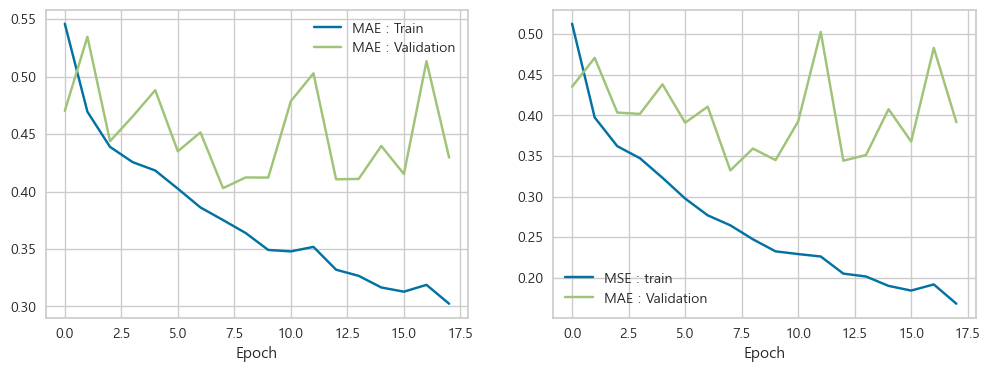

In [68]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(hist['epoch'], hist['mean_absolute_error'], label='MAE : Train')
plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='MAE : Validation')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['epoch'], hist['mean_squared_error'], label='MSE : train')
plt.plot(hist['epoch'], hist['val_mean_squared_error'], label='MAE : Validation')
plt.xlabel('Epoch')
plt.legend()

In [69]:
normed_test_predictions = model.predict(normed_testX).flatten()
normed_test_predictions

42/42 [==============================] - 1s 21ms/step


array([-0.40519005, -1.4025333 , -1.3307621 , ...,  0.632373  ,
        0.47026747, -0.28078997], dtype=float32)

In [70]:
print('mse : ', np.mean(np.square(normed_test_predictions-normed_testY)))
result_df['cnn'] = pd.Series(np.mean(np.square(normed_test_predictions-normed_testY)))

mse :  0.6133696149516541


In [71]:
def denorm(y):
    return y*df_train_status0['std'][-1] + df_train_status0['mean'][-1]

testY_predictions = denorm(normed_test_predictions)
testY = denorm(normed_testY)

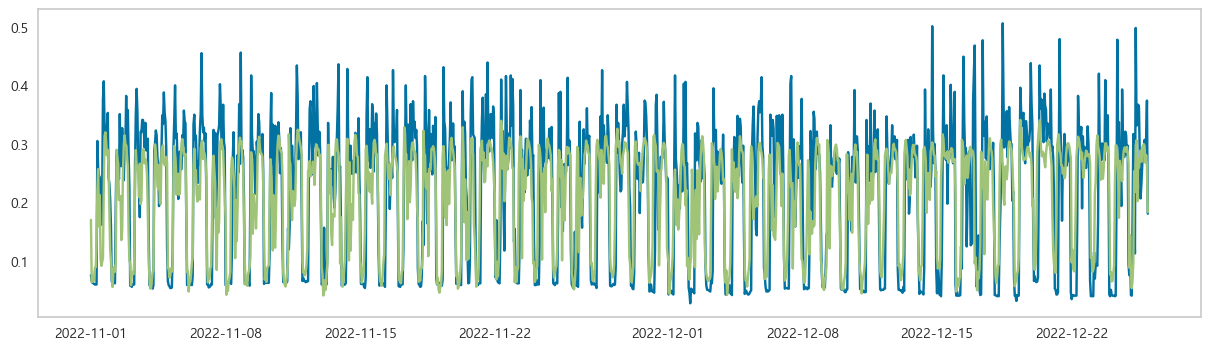

In [72]:
testY_time = df_test0.index#[24:]

# 출력 비교
plt.figure(figsize=(15,4))
plt.plot(testY_time[0:1320], testY)
plt.plot(testY_time[0:1320], testY_predictions)
plt.grid()
plt.show()

In [73]:
WF_df.describe()

,POP,PTY,REH,SKY,TMN,TMP,TMX,UUU,VEC,VVV,WAV,WSD,DI
count,149650.000000,149790.000000,149598.000000,149793.000000,5463.000000,149985.000000,6281.000000,149790.000000,149656.000000,149784.000000,149397.0,149650.000000,149598.000000
mean,18.858617,0.126277,67.185243,2.557289,12.812374,16.473851,21.073396,0.373303,198.595786,0.166789,0.0,1.905515,61.456736
std,19.539947,0.472452,17.130719,1.355435,10.118889,10.346258,10.120494,1.548899,97.159012,1.504611,0.0,1.132347,14.947383
min,0.000000,0.000000,0.000000,0.000000,-14.000000,-14.000000,-8.000000,-13.000000,0.000000,-14.700000,0.0,0.000000,16.656000
25%,0.000000,0.000000,55.000000,1.000000,7.000000,11.000000,16.000000,-0.700000,117.000000,-0.800000,0.0,1.100000,52.640000
50%,20.000000,0.000000,70.000000,3.000000,15.000000,19.000000,24.000000,0.300000,207.000000,0.200000,0.0,1.600000,63.875000
75%,30.000000,0.000000,80.000000,4.000000,22.000000,25.000000,29.000000,1.300000,287.000000,1.100000,0.0,2.500000,73.781000
max,100.000000,4.000000,95.000000,4.000000,27.000000,35.000000,35.000000,11.900000,360.000000,9.700000,0.0,15.600000,85.456000


### XGB

In [74]:
## 시계열 data machine learing model input 생성을 위한 함수
# window size 는 총 학습할 기간에 해당하며, step size는 다음 sequence의 시작 step을 의미한다. 
# 즉 window size 가 10 이라면 10일 치의 과거 데이터가 indexing 되며(0~9), step size가 1 이라면, (1~10), (2~11) 이런식으로 시작 step이 설정된다.

def get_indices_entire_sequence(
    data: pd.DataFrame, 
    window_size: int, 
    step_size: int
    ) -> list:
        """
        Produce all the start and end index positions that is needed to produce
        the sub-sequences. 
        Returns a list of tuples. Each tuple is (start_idx, end_idx) of a sub-
        sequence. These tuples should be used to slice the dataset into sub-
        sequences. These sub-sequences should then be passed into a function
        that slices them into input and target sequences. 
        
        Args:
            data (pd.DataFrame): Partitioned data set, e.g. training data
            
            window_size (int): The desired length of each sub-sequence. Should be
                               (input_sequence_length + target_sequence_length)
                               E.g. if you want the model to consider the past 100
                               time steps in order to predict the future 50 
                               time steps, window_size = 100+50 = 150
            step_size (int): Size of each step as the data sequence is traversed 
                             by the moving window.
                             If 1, the first sub-sequence will be [0:window_size], 
                             and the next will be [1:window_size].
        Return:
            indices: a list of tuples
        """

        stop_position = len(data)-1 # 1- because of 0 indexing
        
        # Start the first sub-sequence at index position 0
        subseq_first_idx = 0
        
        subseq_last_idx = window_size
        
        indices = []
        
        while subseq_last_idx <= stop_position:

            indices.append((subseq_first_idx, subseq_last_idx))
            
            subseq_first_idx += step_size
            
            subseq_last_idx += step_size

        return indices


## 위 함수에서 생성된 index에 따라 데이터를 추출하는 함수
# data 는 위에서 전처리된 numpy 형태의 data input이며,
# target_seqeunce_length 는 예측할 수치의 수이다. ex) 1 일 경우 1일치에 대한 예측, 10 일 경우 10일치에 대한 예측
# input_seq_len 은 학습 데이터의 기간이다. 이는 위에서 설정한 window size와 동일해야한다.

def get_xgboost_x_y(
    indices: list, 
    data: np.array,
    target_sequence_length,
    input_seq_len: int
    ):

    """
    Args:
        indices: List of index positions at which data should be sliced
        data: A univariate time series
        target_sequence_length: The forecasting horizon, m
        input_seq_len: The length of the model input, n
    Output: 
        all_x: np.array of shape (number of instances, input seq len)
        all_y: np.array of shape (number of instances, target seq len)
    """
    print("Preparing data..")

    # Loop over list of training indices
    for i, idx in enumerate(indices):
        # Slice data into instance of length input length + target length
        x = data[idx[0]:idx[1], :]

        assert len(x) == input_seq_len

        y = data[idx[1]+target_sequence_length-1, -1]

        # Create all_y and all_x objects in first loop iteration
        if i == 0:
            all_y = y.reshape(1, -1)
            all_x = x.reshape(1, -1)
        else:
            all_y = np.concatenate((all_y, y.reshape(1, -1)), axis=0)
            all_x = np.concatenate((all_x, x.reshape(1, -1)), axis=0)

    print("Finished preparing data!")
    return all_x, all_y


seq_length = 24

indices_tr = get_indices_entire_sequence(data=norm_df_train0, window_size=seq_length, step_size=1) # data에 따른 train index 생성
indices_te = get_indices_entire_sequence(data=norm_df_test0, window_size=seq_length, step_size=1) # data에 따른 test index 생성

xg_train_x, xg_train_y= get_xgboost_x_y(indices=indices_tr, data=normed_train_data, target_sequence_length=1, input_seq_len=seq_length) # data에 따른 train index 생성
xg_test_x, xg_test_y= get_xgboost_x_y(indices=indices_te, data=normed_test_data, target_sequence_length=1, input_seq_len=seq_length) # data에 따른 train index 생성


print(xg_train_x.shape, xg_train_y.shape)
print(xg_test_x.shape, xg_test_y.shape)


Preparing data..
Finished preparing data!
Preparing data..
Finished preparing data!
(4992, 192) (4992, 1)
(1320, 192) (1320, 1)


In [75]:
## Grid Search Cross Validation을 활용한 xgboost model의 hyper parameter tunning
## 아래 xgboost params dictionary에서 test data set 의 평가 metric이 최대가 되는 parameter를 선택하게된다.
try:
    params = {'max_depth': [2, 4, 6],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.2, 0.6, 0.8],
           'min_child_weight': [3, 5, 7],
           'gamma': [0.3, 0.5, 0.7],
           'subsample': [0.4, 0.6, 0.8]}

    gridcv = GridSearchCV(xgb(), param_grid=params, cv=3)

    gridcv.fit(xg_train_x, xg_train_y, early_stopping_rounds=30, eval_metric='auc', eval_set=[(xg_test_x, xg_test_y)])
except Exception as e:
    print(e)

[13:29:40] C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/metric/auc.cc:324: Check failed: auc <= local_area (403747 vs. 45195.2) : 


In [76]:
# 추출된 best parameter 확인
gridcv.best_params_

{'colsample_bytree': 0.2,
 'gamma': 0.3,
 'max_depth': 2,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 0.4}

In [77]:
from sklearn.multioutput import MultiOutputRegressor

# 시계열 예측 모델을 위한 multioutput library 객체 생성 및 학습
model_xgb = MultiOutputRegressor(xgb(gridcv.best_params_)).fit(xg_train_x, xg_train_y)

In [78]:
# test data 예측 및 mse loss 계산
y_pred = model_xgb.predict(xg_test_x)
print('mse : ', np.mean(np.square(y_pred-normed_testY.reshape(-1,1))))

#결과 data frame에 해당 loss 값 할당
result_df['xgboost'] = pd.Series(np.mean(np.square(y_pred-normed_testY.reshape(-1,1))))

mse :  0.4494318466145508


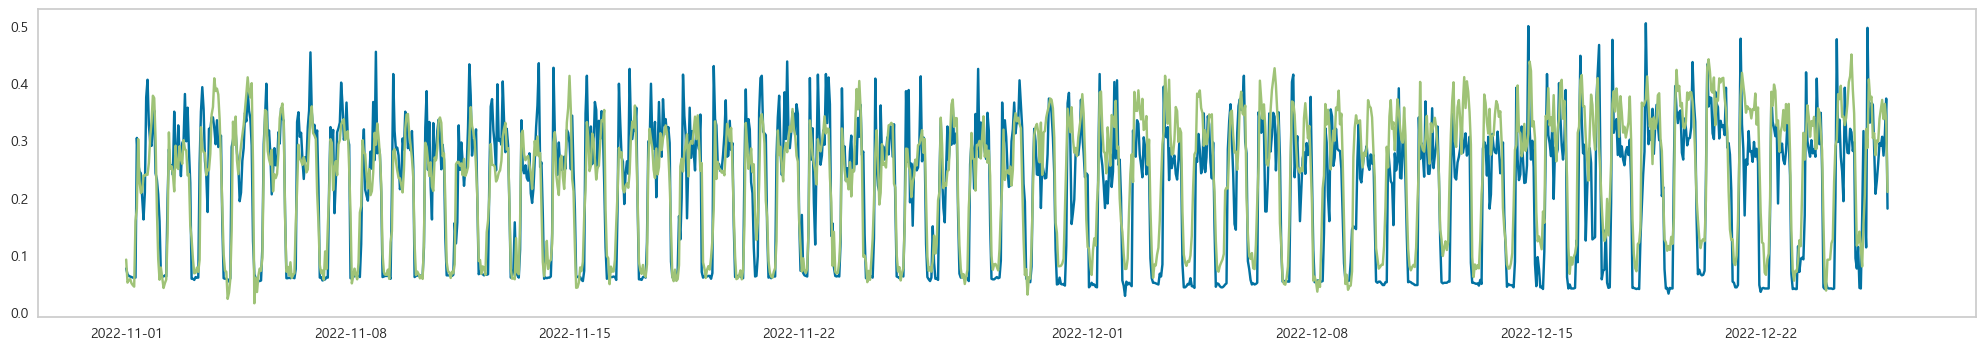

In [79]:
# denormalize 후 원래 y값 기준으로 비교
testY_predictions = denorm(y_pred)
testY = denorm(normed_testY)

testY_time = df_test0.index#[24:]

# 출력 비교
plt.figure(figsize=(25,4))
plt.plot(testY_time[0:1320], testY)
plt.plot(testY_time[0:1320], testY_predictions)
plt.grid()
plt.show()

## LSTM

In [80]:
# lstm model layer 생성

def lstm_model(input_size):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(32, activation='relu', input_shape=input_size, return_sequences=True))# return sequence true를 통해 다음 layer에 전달할 hiddenlayer를 return 해준다.
    model.add(tf.keras.layers.LSTM(32, return_sequences=False)) # 마지막 시점의 sequence만 return 함
    model.add(tf.keras.layers.Flatten()) # fc layer에 넣기 위한 flatten 과정
    model.add(tf.keras.layers.Dense(5)) # fc layer node 5개 
    model.add(tf.keras.layers.Dense(1)) # 출력 layer
    return model

print('Sequence Size : ', normed_trainX.shape[1:])
print()
lstm_rgr = lstm_model(normed_trainX.shape[1:])
lstm_rgr.summary()

Sequence Size :  (24, 8)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 24, 32)            5248      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 flatten_4 (Flatten)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 5)                 165       
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 13,739
Trainable params: 13,739
Non-trainable params: 0
_________________________________________________________________


In [81]:
# lstm compile, lr = 1e-3, opt = Adam
lstm_rgr.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='mean_squared_error',
             metrics=['mean_absolute_error', 'mean_squared_error'])

In [82]:
EPOCHS = 100

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# lstm 학습
history = lstm_rgr.fit(normed_trainX, normed_trainY, epochs=EPOCHS, validation_split = 0.2, callbacks=[early_stop])
# 학습시 저장된 history 출력
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

Epoch 1/100
125/125 [==============================] - 6s 24ms/step - loss: 0.6354 - mean_absolute_error: 0.6516 - mean_squared_error: 0.6354 - val_loss: 0.5860 - val_mean_absolute_error: 0.6138 - val_mean_squared_error: 0.5860
Epoch 2/100
125/125 [==============================] - 2s 17ms/step - loss: 0.4056 - mean_absolute_error: 0.4949 - mean_squared_error: 0.4056 - val_loss: 0.4762 - val_mean_absolute_error: 0.5377 - val_mean_squared_error: 0.4762
Epoch 3/100
125/125 [==============================] - 2s 17ms/step - loss: 0.3173 - mean_absolute_error: 0.4275 - mean_squared_error: 0.3173 - val_loss: 0.3570 - val_mean_absolute_error: 0.4504 - val_mean_squared_error: 0.3570
Epoch 4/100
125/125 [==============================] - 2s 16ms/step - loss: 0.2921 - mean_absolute_error: 0.3978 - mean_squared_error: 0.2921 - val_loss: 0.3448 - val_mean_absolute_error: 0.4382 - val_mean_squared_error: 0.3448
Epoch 5/100
125/125 [==============================] - 2s 17ms/step - loss: 0.2740 - mea

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,0.635399,0.651649,0.635399,0.586035,0.613840,0.586035,0
1,0.405620,0.494888,0.405620,0.476238,0.537717,0.476238,1
2,0.317293,0.427513,0.317293,0.356963,0.450416,0.356963,2
3,0.292086,0.397796,0.292086,0.344811,0.438204,0.344811,3
4,0.274017,0.381443,0.274017,0.333013,0.422753,0.333013,4
5,0.264178,0.372025,0.264178,0.309036,0.397045,0.309036,5
6,0.263667,0.371715,0.263667,0.312752,0.406061,0.312752,6
7,0.256794,0.366943,0.256794,0.297566,0.386051,0.297566,7
8,0.255067,0.364031,0.255067,0.312365,0.405834,0.312365,8
9,0.251970,0.359890,0.251970,0.297453,0.385387,0.297453,9


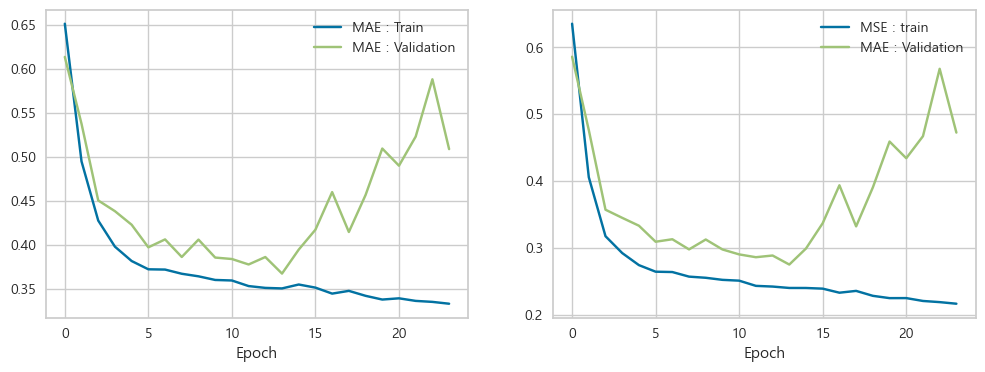

In [83]:
# lstm hist plot
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(hist['epoch'], hist['mean_absolute_error'], label='MAE : Train')
plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='MAE : Validation')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['epoch'], hist['mean_squared_error'], label='MSE : train')
plt.plot(hist['epoch'], hist['val_mean_squared_error'], label='MAE : Validation')
plt.xlabel('Epoch')
plt.legend()

In [84]:
# 학습된 lstm 모델 활용한 test data predict
y_pred_lstm = lstm_rgr.predict(normed_testX).flatten()
y_pred_lstm.shape, normed_testY.shape

42/42 [==============================] - 1s 4ms/step


((1320,), (1320,))

In [85]:
# lstm 모델의 예측 평가 지표 확인 및 return df 에 저장
print('mse : ', np.mean(np.square(y_pred_lstm-normed_testY)))

result_df['lstm'] = pd.Series(np.mean(np.square(y_pred_lstm-normed_testY)))

mse :  1.1235731154267559


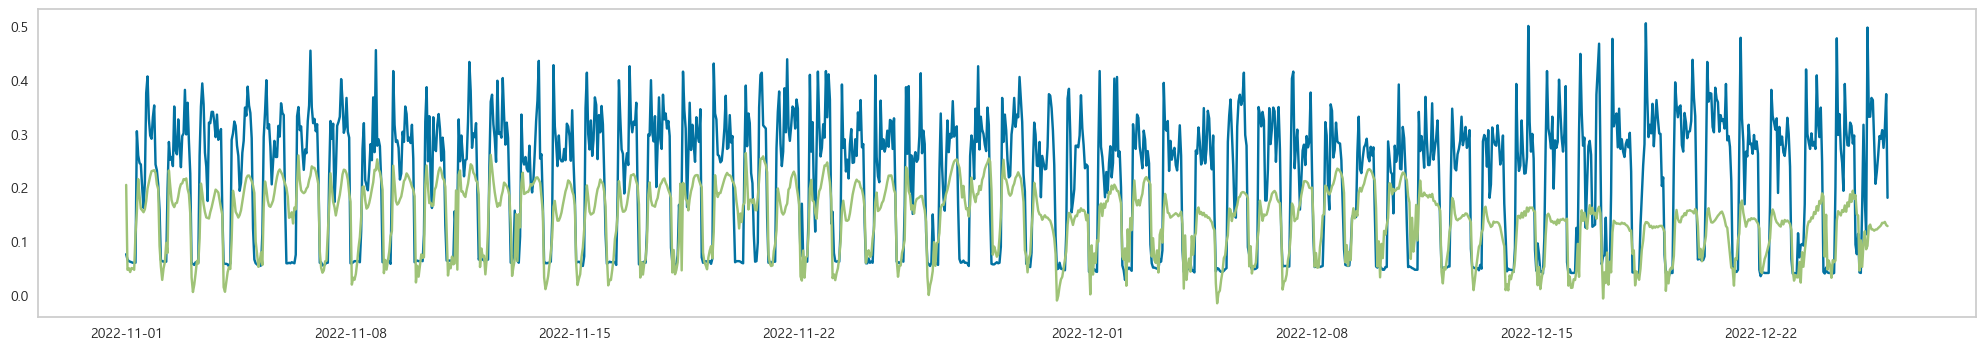

In [86]:
# denormalize 후 원래 y값 기준으로 비교
def denorm(y):
    return y*df_train_status0['std'][-1] + df_train_status0['mean'][-1]

testY_predictions = denorm(y_pred_lstm)
testY = denorm(normed_testY)

testY_time = df_test0.index#[24:]

# 출력 비교
plt.figure(figsize=(25,4))
plt.plot(testY_time[0:1320], testY)
plt.plot(testY_time[0:1320], testY_predictions)
plt.grid()
plt.show()

# CNN-LSTM

In [87]:
# cnn-lstm 결합 모델링

def cnn_lstm(input_data):
    model_cnn_lstm = tf.keras.Sequential()
    # 시계열 data를 활용한 cnn-lstm을 modeling 하려면, 각Step의 오류가 역전파되어 weight가 update되어야하므로, Time Distrubuted 함수를 활용하여 각 sequence에 전파되도록한다.
    model_cnn_lstm.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'), 
                                                                              input_shape=(None, input_data.shape[2], input_data.shape[3])))
    model_cnn_lstm.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling1D(pool_size=2)))
    model_cnn_lstm.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
    model_cnn_lstm.add(tf.keras.layers.LSTM(50, activation='relu'))
    model_cnn_lstm.add(tf.keras.layers.Dense(1))
    return model_cnn_lstm

In [88]:
# cnn-lstm model에 입력될 data 형태로 변경하기 위한 과정
subsequences = 8
timesteps = xg_train_x.shape[1]//subsequences
X_train_series_sub = xg_train_x.reshape((xg_train_x.shape[0], subsequences, timesteps, 1))
X_test_series_sub = xg_test_x.reshape((xg_test_x.shape[0], subsequences, timesteps, 1))

print(X_train_series_sub.shape, X_test_series_sub.shape)

(4992, 8, 24, 1) (1320, 8, 24, 1)


In [89]:
cnn_lstm_rgr = cnn_lstm(X_train_series_sub)
cnn_lstm_rgr.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, None, 24, 64)     128       
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, None, 12, 64)     0         
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, None, 768)        0         
 tributed)                                                       
                                                                 
 lstm_4 (LSTM)               (None, 50)                163800    
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                      

In [90]:
cnn_lstm_rgr.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     loss='mean_squared_error',
                     metrics=['mean_absolute_error', 'mean_squared_error'])

In [91]:
EPOCHS = 100

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = cnn_lstm_rgr.fit(X_train_series_sub, xg_train_y, epochs=EPOCHS, validation_split = 0.2, callbacks=[early_stop])

Epoch 1/100
125/125 [==============================] - 4s 16ms/step - loss: 0.5412 - mean_absolute_error: 0.5912 - mean_squared_error: 0.5412 - val_loss: 0.5619 - val_mean_absolute_error: 0.5790 - val_mean_squared_error: 0.5619
Epoch 2/100
125/125 [==============================] - 2s 13ms/step - loss: 0.3914 - mean_absolute_error: 0.4858 - mean_squared_error: 0.3914 - val_loss: 0.5617 - val_mean_absolute_error: 0.5709 - val_mean_squared_error: 0.5617
Epoch 3/100
125/125 [==============================] - 2s 13ms/step - loss: 0.3546 - mean_absolute_error: 0.4568 - mean_squared_error: 0.3546 - val_loss: 0.4915 - val_mean_absolute_error: 0.5293 - val_mean_squared_error: 0.4915
Epoch 4/100
125/125 [==============================] - 2s 13ms/step - loss: 0.3332 - mean_absolute_error: 0.4405 - mean_squared_error: 0.3332 - val_loss: 0.4978 - val_mean_absolute_error: 0.5272 - val_mean_squared_error: 0.4978
Epoch 5/100
125/125 [==============================] - 1s 11ms/step - loss: 0.3158 - mea

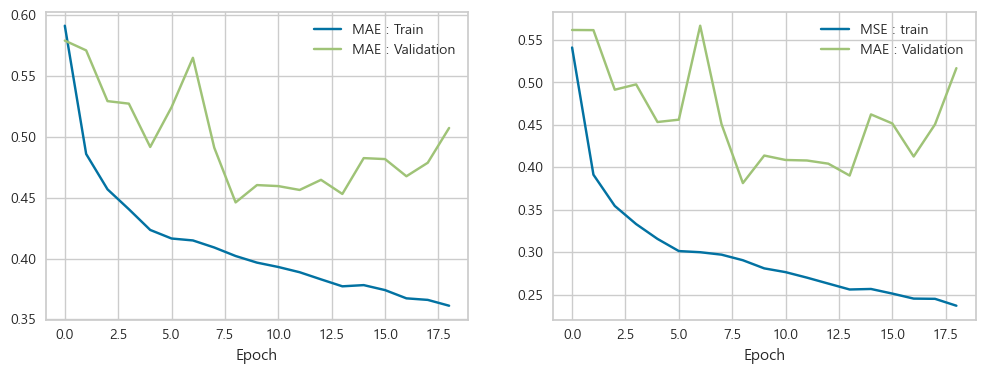

In [92]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(hist['epoch'], hist['mean_absolute_error'], label='MAE : Train')
plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='MAE : Validation')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['epoch'], hist['mean_squared_error'], label='MSE : train')
plt.plot(hist['epoch'], hist['val_mean_squared_error'], label='MAE : Validation')
plt.xlabel('Epoch')
plt.legend()

In [93]:
cnn_lstm_predict = cnn_lstm_rgr.predict(X_test_series_sub).flatten()
cnn_lstm_predict

42/42 [==============================] - 0s 4ms/step


array([-1.061376 , -1.8322533, -1.552635 , ..., -1.2409554, -1.1136695,
       -1.1673414], dtype=float32)

In [94]:
print('mse : ', np.mean(np.square(cnn_lstm_predict-normed_testY)))
result_df['cnn_lstm'] = pd.Series(np.mean(np.square(cnn_lstm_predict-normed_testY)))

mse :  1.1562207015230839


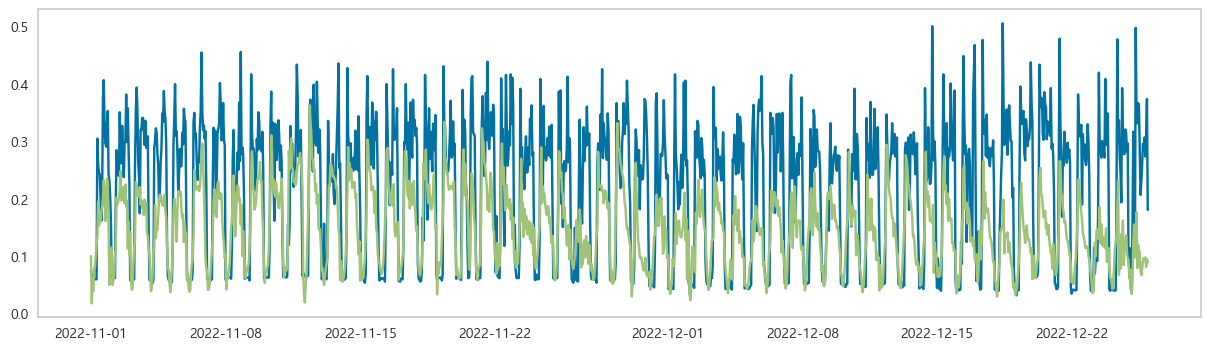

In [95]:
def denorm(y):
    return y*df_train_status0['std'][-1] + df_train_status0['mean'][-1]

testY_predictions = denorm(cnn_lstm_predict)
testY = denorm(xg_test_y.reshape(-1))

testY_time = df_test0.index#[24:]

# 출력 비교
plt.figure(figsize=(15,4))
plt.plot(testY_time[0:1320], testY)
plt.plot(testY_time[0:1320], testY_predictions)
plt.grid()
plt.show()

Text(0.5, 0, 'MSE')

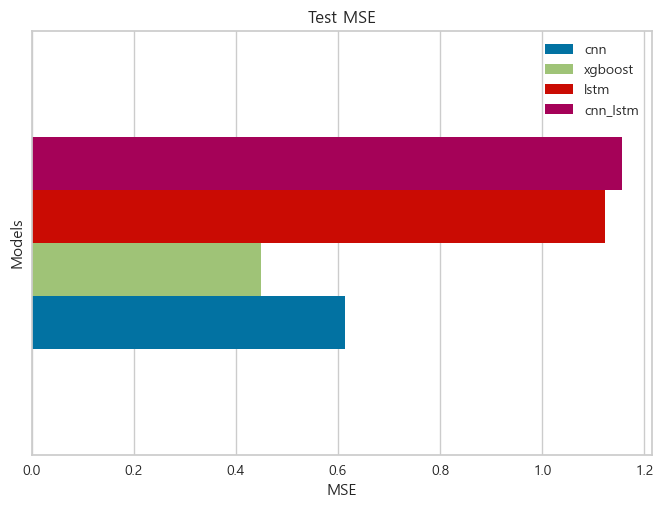

In [96]:
result_df.plot.barh()
plt.title('Test MSE')
plt.yticks([])
plt.ylabel('Models')
plt.xlabel('MSE')